In [1]:
library(Matrix)
library("data.table")
library(Seurat)


Attaching SeuratObject



In [4]:
# Load counts
#LV12_t: Transcritpomic dataset of STICR-E12 
counts <- readRDS("GSM5684872_LV12_filtered_RNA_counts")

In [17]:
counts[1:10]

[1] 2 0 4 0 1 2 3 0 0 0

In [15]:
head(row.names(counts))

[1] "Xkr4"   "Sox17"  "Mrpl15" "Lypla1" "Tcea1"  "Rgs20"

In [14]:
head(colnames(counts))

[1] "LV12_AAACCCAAGCTGACAG" "LV12_AAACGAAGTATGCAAA" "LV12_AAACGCTAGTTGCATC"
[4] "LV12_AAAGGATTCACTGGGC" "LV12_AAAGGGCTCACACCCT" "LV12_AAAGGGCTCATGCTAG"

In [25]:
#LV12_t: Transcritpomic dataset of STICR-E12 
metadataCells = data.frame(barcode = colnames(counts), age = "E12",source = "STICR")

In [28]:
row.names(metadataCells) = metadataCells$barcode
head(metadataCells)


,barcode,age,source
,<chr>,<chr>,<chr>
LV12_AAACCCAAGCTGACAG,LV12_AAACCCAAGCTGACAG,E12,STICR
LV12_AAACGAAGTATGCAAA,LV12_AAACGAAGTATGCAAA,E12,STICR
LV12_AAACGCTAGTTGCATC,LV12_AAACGCTAGTTGCATC,E12,STICR
LV12_AAAGGATTCACTGGGC,LV12_AAAGGATTCACTGGGC,E12,STICR
LV12_AAAGGGCTCACACCCT,LV12_AAAGGGCTCACACCCT,E12,STICR
LV12_AAAGGGCTCATGCTAG,LV12_AAAGGGCTCATGCTAG,E12,STICR


In [34]:
pbmcSTICRE12 <- CreateSeuratObject(counts = counts, min.cells = 3
                             , min.features = 200, meta.data = metadataCells)

In [35]:
pbmcSTICRE12

An object of class Seurat 
17583 features across 1232 samples within 1 assay 
Active assay: RNA (17583 features, 0 variable features)

In [44]:
#Transcritpomic dataset of STICR-E14
counts <- readRDS("GSM5684873_CA304_filtered_RNA_counts")
dim(counts)

[1] 21051  1398

In [41]:
#Transcritpomic dataset of STICR-E14
metadataCells = data.frame(barcode = colnames(counts), age = "E14",source = "STICR")

In [43]:
head(metadataCells)
dim(metadataCells)

,barcode,age,source
,<chr>,<chr>,<chr>
1,CA304_AAACCCAGTGGCTGAA,E14,STICR
2,CA304_AAACGAACATGGGATG,E14,STICR
3,CA304_AAAGAACTCATTGTGG,E14,STICR
4,CA304_AAAGAACTCCTTTAGT,E14,STICR
5,CA304_AAAGGATCAGGCAATG,E14,STICR
6,CA304_AAAGGATCATTAAAGG,E14,STICR


[1] 1398    3

In [39]:
pbmcSTICRE14 <- CreateSeuratObject(counts = counts, min.cells = 3
                             , min.features = 200, meta.data = metadataCells)

Warning message in CreateSeuratObject.default(counts = counts, min.cells = 3, min.features = 200, :
“Some cells in meta.data not present in provided counts matrix”


In [45]:
pbmcSTICRE14

An object of class Seurat 
15545 features across 1398 samples within 1 assay 
Active assay: RNA (15545 features, 0 variable features)

In [46]:
pbmc <- merge(pbmcSTICRE12, y = c(pbmcSTICRE14), 
              add.cell.ids = c("E12", "E14"), project = "brainDev")
pbmc

An object of class Seurat 
17706 features across 2630 samples within 1 assay 
Active assay: RNA (17706 features, 0 variable features)

In [47]:
row.names(counts)[grep("mt-",row.names(counts))]

[1] "mt-Nd1"  "mt-Nd2"  "mt-Co1"  "mt-Co2"  "mt-Atp8" "mt-Atp6" "mt-Co3" 
 [8] "mt-Nd3"  "mt-Nd4l" "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Cytb"

In [48]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^mt-")

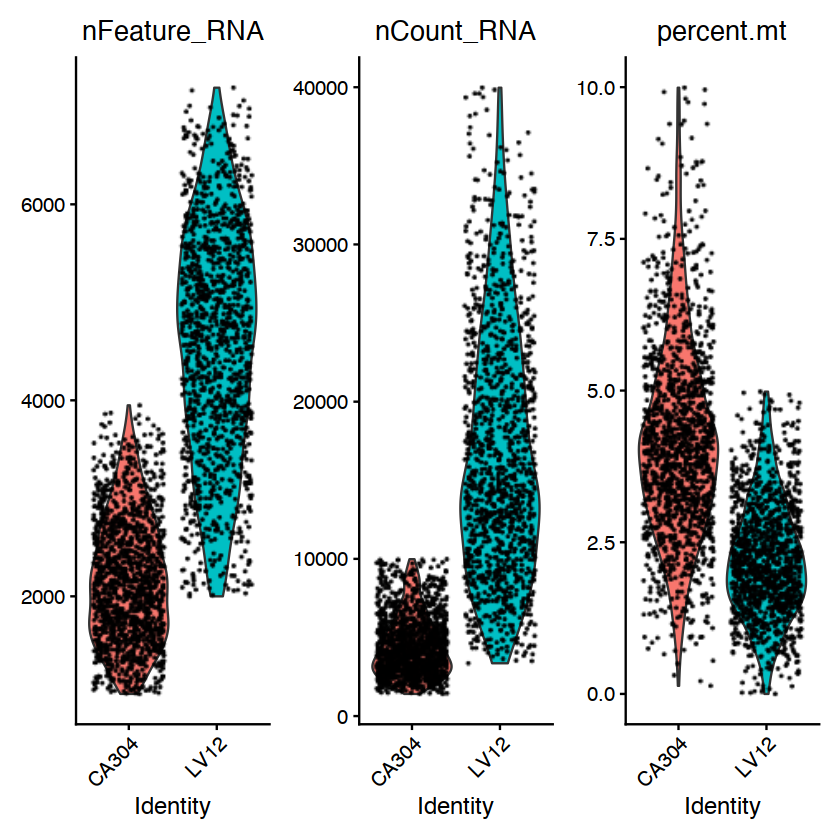

In [49]:
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)